Projeto em grupo I
Author: Regina Lacerda Pinheiro Araújo

Email: lacerda.pinheiro@aluno.ifsp.edu.br

Date: Dez/2020

Description: Projeto Em grupo I - Análise Exploratória (INTI6) 259391] INTELIGÊNCIA ARTIFICIA

Dados obtidos do portal kaggle: https://www.kaggle.com/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy?select=transformed_data.csv





Impacto da pandemia de Covid-19 na economia global.




```
# Isto está formatado como código
```


stringency_index - índice de rigor
é uma das métricas usadas pelo Oxford COVID-19 Government Response Tracker.
O Tracker envolve uma equipe de 100 membros da comunidade de Oxford que atualizam continuamente um banco de dados de 17 indicadores de resposta do governo.
Esses indicadores examinam políticas de contenção, como fechamento de escolas e locais de trabalho, eventos públicos, transporte público, políticas de permanência em casa.
O Índice de Estringência é um número de 0 a 100 que reflete esses indicadores. Uma pontuação de índice mais alta indica um nível mais alto de rigor.

GDP Per Capita - PIB 
O PIB ou produto interno bruto de um país é calculado levando-se em consideração o valor monetário dos bens e serviços de uma nação após um certo período de tempo, geralmente um ano. É uma medida de ação econômica.

# HDI-human_development_index -> Índice de Desenvolvimento Humano (IDH)

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
import pandas as pd
import geopandas as gpd
#import geoplot as gplt
#from mpl_toolkits.basemap import Basemap
import matplotlib.dates as md
#import mapclassify
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


In [321]:
df = pd.read_csv('/content/drive/MyDrive/IA - Eletiva/Trabalho em Grupo/raw_data.csv',sep=',')
print(df.shape)
df.drop('Unnamed: 9', inplace=True, axis=1)
df.drop('Unnamed: 10', inplace=True, axis=1)
df.drop('Unnamed: 11', inplace=True, axis=1)
df.drop('Unnamed: 12', inplace=True, axis=1)
df.drop('Unnamed: 13', inplace=True, axis=1)
df.head()

(50418, 14)


,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.5+ MB


In [309]:
df.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

In [322]:
 #prencher os dados faltantes com a mediana
df.fillna(df.median(),inplace=True)

In [333]:
df.isnull().sum()

iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
year                       0
month                      0
day                        0
dtype: int64

In [310]:
df.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


In [311]:
df.dtypes

iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
dtype: object

In [324]:
df['date']= pd.to_datetime(df['date'])
df['date']

0       2019-12-31
1       2020-01-01
2       2020-01-02
3       2020-01-03
4       2020-01-04
           ...    
50413   2020-10-15
50414   2020-10-16
50415   2020-10-17
50416   2020-10-18
50417   2020-10-19
Name: date, Length: 50418, dtype: datetime64[ns]

In [325]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['month'] = df['date'].dt.month # month
df['day'] = df['date'].dt.day # day
df['year'] = df['year'].fillna(0.0).astype(int)
df['month'] = df['month'].fillna(0.0).astype(int)
df['day'] = df['day'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

In [314]:
#Correlação de cada dado
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,year,month,day
total_cases,1.0,0.91,0.063,0.3,0.069,0.092,0.0024,0.13,-0.0055
total_deaths,0.91,1.0,0.056,0.26,0.11,0.15,0.0033,0.12,-0.0032
stringency_index,0.063,0.056,1.0,0.041,-0.19,-0.2,0.029,0.17,0.043
population,0.3,0.26,0.041,1.0,-0.072,-0.017,-0.011,-0.056,-0.0036
gdp_per_capita,0.069,0.11,-0.19,-0.072,1.0,0.73,-0.021,-0.12,-0.0078
human_development_index,0.092,0.15,-0.2,-0.017,0.73,1.0,-0.022,-0.13,-0.009
year,0.0024,0.0033,0.029,-0.011,-0.021,-0.022,1.0,-0.087,-0.064
month,0.13,0.12,0.17,-0.056,-0.12,-0.13,-0.087,1.0,-0.11
day,-0.0055,-0.0032,0.043,-0.0036,-0.0078,-0.009,-0.064,-0.11,1.0


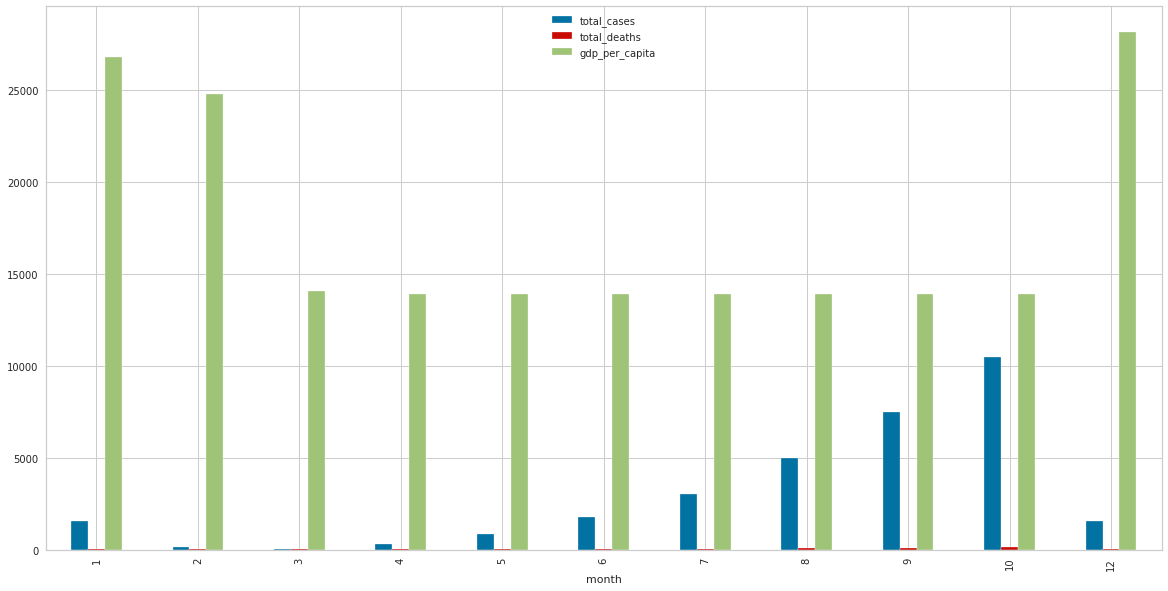

In [326]:
color_list = ['b', 'r','g']
df[['location','month', 'total_cases', 'total_deaths','gdp_per_capita']].groupby(["month"]).median().plot.bar(color=color_list,figsize=(20, 10))
plt.show( )

In [327]:
#mortes por mês
grouped_month=df.groupby('month').mean()
px.bar(data_frame=grouped_month,x=grouped_month.index,color=grouped_month.index,y='total_deaths',labels={'x':'Months'})

In [328]:
#10 países que tiveram o menor impacto em termos de desemprego
grouped_countries=df.groupby('location').mean()
grouped_countries.sort_values('total_deaths',ascending=True,inplace=True)
px.bar(data_frame=grouped_countries.iloc[:10,:],x=grouped_countries.index[:10],color=grouped_countries[:10].index,y='total_deaths',labels={'x':'Países'})

In [329]:
#Os 10 principais países atingidos pelas taxas mais altas de mortalidade
grouped_countries=df.groupby('location').mean()
grouped_countries.sort_values('total_deaths',ascending=False,inplace=True)
px.bar(data_frame=grouped_countries.iloc[:10,:],x=grouped_countries.index[:10],color=grouped_countries[:10].index,y='total_deaths',labels={'x':'Países'})

In [330]:
#Agrupando por code do país, ano e mês
data_mean = df.groupby(["iso_code", "year", "month"]).mean()
data_mean = data_mean.reset_index()

In [331]:
#Podemos ver que o total de mortes está aumentando continuamente nos Estados Unidos, Brasil, México e Índia. Nesses países, provavelmente haverá um impacto maior na economia.
fig = px.line(data_mean, x="month", y="total_deaths", color="iso_code", 
              title='total_deaths',
              template="simple_white")
fig.show()

In [332]:
#Podemos ver que  o indice de contenção (nível de rigor) está aumentando em cada país por volta de abril, mas tem sido constante ou caindo desde então.
fig = px.line(data_mean, x="month", y="stringency_index", color="iso_code", 
              title='stringency_index',
              template="simple_white")
fig.show()

In [334]:
temp = df.groupby("date")["total_cases"].sum().reset_index()
fig = px.bar(temp, x='date', y='total_cases',
             hover_data=['total_cases'], color='total_cases',
             labels={'pop':'Número total de casos confirmados'}, height=400)
fig.show()

In [335]:
df['stringency_index'].mean()

56.86136141854239

In [336]:
df["human_development_index"].corr(df["gdp_per_capita"]), df["human_development_index"].mean()

(0.6948151890230709, 0.7240578563212934)

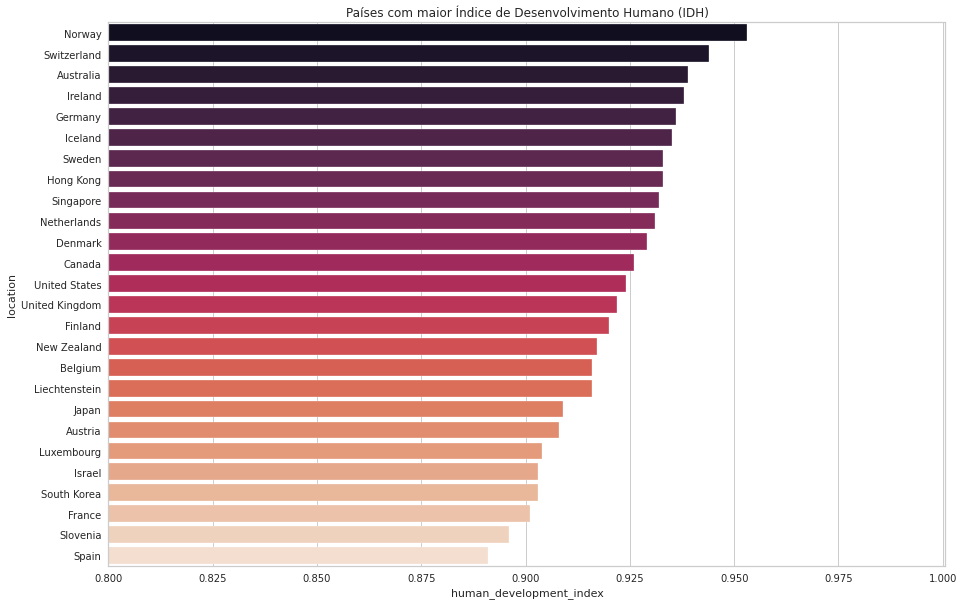

In [337]:
et = df.sort_values(by='human_development_index', ascending=False)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.location, x=et.human_development_index, palette="rocket")
plt.xticks()
plt.xlabel('human_development_index')
plt.xlim(xmin=0.8)
plt.ylabel('location')
plt.title('Países com maior Índice de Desenvolvimento Humano (IDH)')
plt.show()

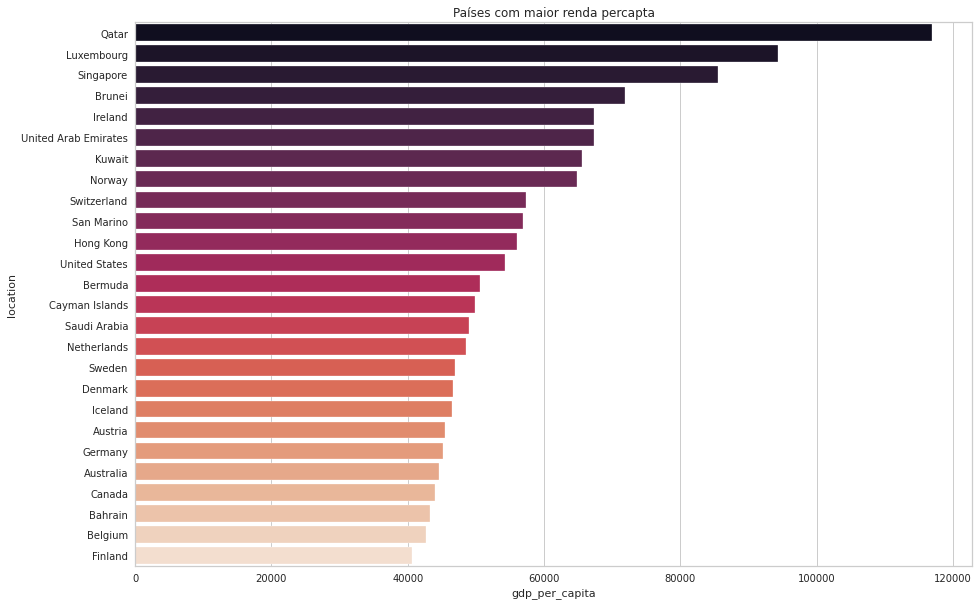

In [338]:
percapta = df.sort_values(by='gdp_per_capita', ascending=False)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=percapta.location, x=percapta.gdp_per_capita, palette='rocket')
plt.xticks()
plt.xlabel('gdp_per_capita')
plt.ylabel('location')
plt.title('Países com maior renda percapta')
plt.show()

O impacto da pandemia COVID-19 em cada país

In [ ]:
O impacto da pandemia COVID-19 em cada país

In [339]:
def df_show(country=sorted(set(df['location']))):
    HDI= df[df['location']==country]['human_development_index'].max()*10
    GDPCAP = df[df['location']==country]['gdp_per_capita'].mean()
    POP= df[df['location']==country]['population'].max()

    total1= [HDI, GDPCAP, POP]

    TD= df[df['location']==country].groupby(['DATE']).agg({'total_deaths':['sum']})
    TC = df[df['location']==country].groupby(['DATE']).agg({'total_cases':['sum']})
    STI = df[df['location']==country].groupby(['DATE']).agg({'stringency_index':['sum']})

    total2 = TD.join(TC).join(STI)

    plt.figure(figsize=(15,10))
    plt.subplot(121)
    names = ['HDI','GDPCAP', 'POP']
    plt.bar(names, total1)
    plt.ylabel("Counts", size=13)

    plt.subplot(122)
    total2.plot(ax=plt.gca(), title=country)
    plt.ylim((0, 16))
    # setting the max value to see the df in the same env
    plt.ylabel("Counts", size=13)

Text(0, 0.5, 'Counts')

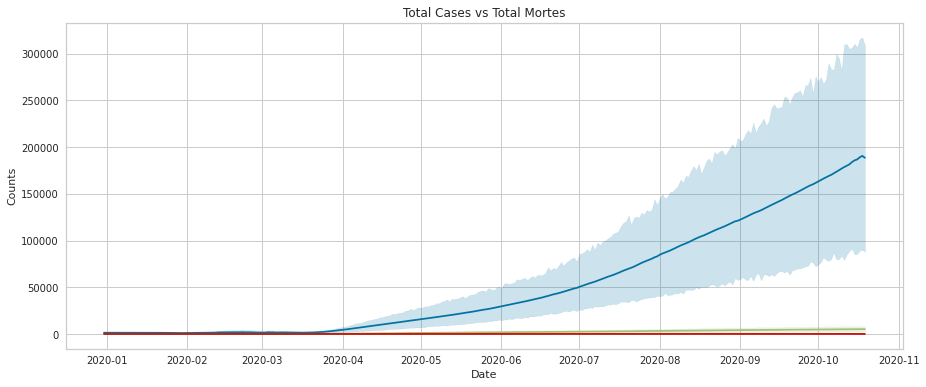

In [340]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(x=df["date"], y=df["total_cases"])
sns.lineplot(x=df["date"], y=df["total_deaths"])
sns.lineplot(x=df["date"], y=df["stringency_index"])

ax.set_title("Total Cases vs Total Mortes")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")



In [136]:
#Criando coluna taxa de mortalidade
df['taxa_mortalidade']=df['total_deaths']*100/df['total_cases']

In [138]:
df.head(3)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,taxa_mortalidade
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,NaN
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,NaN
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,NaN


In [147]:
Brasil = df[df["location"]=="Brazil"]

In [149]:
Brasil1=pd.DataFrame(Brasil.iloc[-1]).T
Brasil1=Brasil1[["taxa_mortalidade"]].values

In [203]:
print("Taxa de mortalidade no Brasil (mortes por 100 pacientes infectados: ",Brasil1)

Taxa de mortalidade no Brasil (mortes por 100 pacientes infectados:  [[2.939730416950634]]


In [151]:
df["taxa_infeccao"]=(df["total_cases"]/df["population"])*10000

In [155]:
df1=df
fig = px.line(df1, x="stringency_index", y="taxa_infeccao",color="location",width=1200, height=900,
                 title="O efeito das medidas de saúde pública durante a pandemia: índice de rigor vs. taxa de infecção",
                 hover_data=['stringency_index', "taxa_infeccao"])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Países com as medidas de saúde pública mais rigorosas, quais as medidas que essas medidas foram implementadas e suas taxas de infecção na época

In [161]:
df1=df[df["taxa_infeccao"]!=0].reset_index()
df2=df1.sort_values(by="stringency_index")
df2.head(3)

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,taxa_mortalidade,taxa_infeccao
24052,24341,JEY,Jersey,2020-07-25,332.0,31.0,0.0,101073,NaN,NaN,9.337349,32.847546
24135,24424,JEY,Jersey,2020-10-16,490.0,32.0,0.0,101073,NaN,NaN,6.530612,48.479812
24136,24425,JEY,Jersey,2020-10-17,490.0,32.0,0.0,101073,NaN,NaN,6.530612,48.479812


In [163]:
#Países com as medidas de saúde pública mais rigorosas
df2.sort_values("stringency_index",ascending=False).nlargest(10,"stringency_index")

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,taxa_mortalidade,taxa_infeccao
21460,21526,IND,India,2020-04-07,4421.0,114.0,100.0,1380004385,6426.674,0.640,2.578602,0.032036
14259,14325,SLV,El Salvador,2020-05-16,1265.0,25.0,100.0,6486201,7292.458,0.674,1.976285,1.950294
12942,13008,DJI,Djibouti,2020-05-07,1120.0,3.0,100.0,988002,2705.406,0.476,0.267857,11.336009
12926,12992,DJI,Djibouti,2020-04-21,846.0,2.0,100.0,988002,2705.406,0.476,0.236407,8.562736
12941,13007,DJI,Djibouti,2020-05-06,1120.0,2.0,100.0,988002,2705.406,0.476,0.178571,11.336009
12939,13005,DJI,Djibouti,2020-05-04,1112.0,2.0,100.0,988002,2705.406,0.476,0.179856,11.255038
12938,13004,DJI,Djibouti,2020-05-03,1112.0,2.0,100.0,988002,2705.406,0.476,0.179856,11.255038
12937,13003,DJI,Djibouti,2020-05-02,1097.0,2.0,100.0,988002,2705.406,0.476,0.182315,11.103216
12936,13002,DJI,Djibouti,2020-05-01,1089.0,2.0,100.0,988002,2705.406,0.476,0.183655,11.022245
12935,13001,DJI,Djibouti,2020-04-30,1077.0,2.0,100.0,988002,2705.406,0.476,0.185701,10.900788


In [164]:
#Os 10 maiores países com taxas de infecção mais altas
df2.sort_values("taxa_infeccao",ascending=False).nlargest(10,"taxa_infeccao")


,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,taxa_mortalidade,taxa_infeccao
3759,3825,BHR,Bahrain,2020-10-19,77902.0,300.0,63.89,1701583,43290.705,0.846,0.385099,457.820747
3758,3824,BHR,Bahrain,2020-10-18,77571.0,295.0,63.89,1701583,43290.705,0.846,0.380297,455.875499
3757,3823,BHR,Bahrain,2020-10-17,77325.0,292.0,63.89,1701583,43290.705,0.846,0.377627,454.429787
3756,3822,BHR,Bahrain,2020-10-16,76954.0,289.0,63.89,1701583,43290.705,0.846,0.375549,452.249464
3755,3821,BHR,Bahrain,2020-10-15,76621.0,287.0,63.89,1701583,43290.705,0.846,0.374571,450.292463
37257,37757,QAT,Qatar,2020-10-19,129431.0,224.0,NaN,2881060,116935.600,0.856,0.173065,449.247846
37256,37756,QAT,Qatar,2020-10-18,129227.0,223.0,NaN,2881060,116935.600,0.856,0.172565,448.539774
3754,3820,BHR,Bahrain,2020-10-14,76272.0,286.0,63.89,1701583,43290.705,0.846,0.374974,448.241432
37255,37755,QAT,Qatar,2020-10-17,128992.0,222.0,NaN,2881060,116935.600,0.856,0.172104,447.724102
37254,37754,QAT,Qatar,2020-10-16,128803.0,222.0,NaN,2881060,116935.600,0.856,0.172356,447.068093


In [165]:
#Como o Brasil respondeu à pandemia desde o início.
df2[df2["location"]=="Brazil"]

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,taxa_mortalidade,taxa_infeccao
6527,6593,BRA,Brazil,2020-01-22,NaN,NaN,0.0,212559409,14103.452,0.759,NaN,NaN
6526,6592,BRA,Brazil,2020-01-21,NaN,NaN,0.0,212559409,14103.452,0.759,NaN,NaN
6525,6591,BRA,Brazil,2020-01-20,NaN,NaN,0.0,212559409,14103.452,0.759,NaN,NaN
6524,6590,BRA,Brazil,2020-01-19,NaN,NaN,0.0,212559409,14103.452,0.759,NaN,NaN
6523,6589,BRA,Brazil,2020-01-18,NaN,NaN,0.0,212559409,14103.452,0.759,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6794,6860,BRA,Brazil,2020-10-15,5140863.0,151747.0,NaN,212559409,14103.452,0.759,2.951781,241.855349
6795,6861,BRA,Brazil,2020-10-16,5169386.0,152460.0,NaN,212559409,14103.452,0.759,2.949286,243.197232
6796,6862,BRA,Brazil,2020-10-17,5200300.0,153214.0,NaN,212559409,14103.452,0.759,2.946253,244.651602
6797,6863,BRA,Brazil,2020-10-18,5224362.0,153675.0,NaN,212559409,14103.452,0.759,2.941507,245.783615


## Como a pandemia afetou a economia mundial?

In [204]:
percapita=df[["location","month","gdp_per_capita"]]

In [205]:
percapita=percapita[percapita["month"]!=12]

In [212]:
print("PIB mensal durante a pandemia para os 5 países mais ricos do mundo: \n")

percapita1=pd.DataFrame(percapita.groupby(["location","month"])["gdp_per_capita"].mean()).sort_values(by="gdp_per_capita",ascending=False)
percapita1

PIB mensal durante a pandemia para os 5 países mais ricos do mundo: 



gdp_per_capita
location month                
Qatar    1            116935.6
         2            116935.6
         9            116935.6
         8            116935.6
         7            116935.6
...                        ...
Vatican  6                 NaN
         7                 NaN
         8                 NaN
         9                 NaN
         10                NaN

[1804 rows x 1 columns]

In [341]:
worldpercapita=df[["gdp_per_capita","month"]]
worldpercapita=worldpercapita[worldpercapita["month"]!=12]
worldpercapita=pd.DataFrame(worldpercapita.groupby("month")["gdp_per_capita"].mean()).reset_index()

In [342]:
fig = px.line(worldpercapita, x="month", y="gdp_per_capita",width=800, height=500,
                 title="PIB mundial mensal durante a pandemia",
                 hover_data=['month', "gdp_per_capita"])
fig.show()

A pandemia diminuiu o crescimento da população mundial?

In [218]:
population=df[["location","month","population"]]

In [219]:
population=population[population["month"]!=12]

In [226]:
population1=pd.DataFrame(population.groupby(["month","location"])["population"].mean()).reset_index()
population2=pd.DataFrame(population1.groupby("month")["population"].sum()).reset_index()
population2["population"]=population2["population"]/1000000000
print("População mundial mensal desde o início da pandemia, em bilhões: \n")
population2

População mundial mensal desde o início da pandemia, em bilhões: 



,month,population
0,1,5.856215
1,2,6.074394
2,3,7.681345
3,4,7.744833
4,5,7.757383
5,6,7.757383
6,7,7.757383
7,8,7.757383
8,9,7.757383
9,10,7.758070


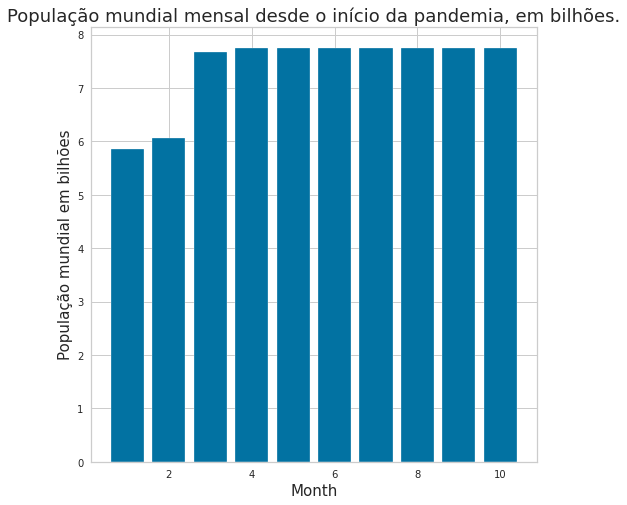

In [343]:

plt.figure(figsize=(8,8))
plt.bar(population2["month"],population2["population"])
plt.title("População mundial mensal desde o início da pandemia, em bilhões.",fontsize=18)
plt.xlabel("Month",fontsize=15)
plt.ylabel("População mundial em bilhões",fontsize=15)
plt.show()

In [228]:
print("Os números nas colunas de população estão em bilhões. Portanto, os números da coluna pib_mundial  também estão em bilhões.")
population3=population2[["population"]]
worldeconomy=pd.concat([worldpercapita,population3],axis=1)
worldeconomy["pib_mundial"]=worldeconomy["population"]*worldeconomy["gdp_per_capita"]
worldeconomy.head()

Os números nas colunas de população estão em bilhões. Portanto, os números da coluna pib_mundial  também estão em bilhões.


,month,gdp_per_capita,population,pib_mundial
0,1,32100.063995,5.856215,187984.871100
1,2,30949.279251,6.074394,187998.102076
2,3,23131.322838,7.681345,177679.678500
3,4,19646.966580,7.744833,152162.480539
4,5,19335.572745,7.757383,149993.438761


In [344]:
fig = px.line(worldeconomy, x="month", y="pib_mundial",width=800, height=500,
                 title="PIB mundial durante a pandemia",
                 hover_data=['month', "pib_mundial"])
fig.show()


Como a pandemia impactou o desenvolvimento humano?

In [349]:
fig = px.bar(df2, x="date", y="human_development_index",color="location",width=1200, height=900,
                 title="Índice de Desenvolvimento Humano",
                 hover_data=['date', "human_development_index"])
fig.show()

Output hidden; open in https://colab.research.google.com to view.